# Исследование тарифов мобильных операторов.

В нашем распоряжении данные компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
# чтение файла с данными и сохранение в df
df_calls = pd.read_csv('../../yandex-praktikum-sources/mobile-calls.csv')
df_internet = pd.read_csv('../../yandex-praktikum-sources/mobile-internet.csv', index_col='Unnamed: 0')
df_messages = pd.read_csv('../../yandex-praktikum-sources/mobile-messages.csv')
df_tariffs = pd.read_csv('../../yandex-praktikum-sources/mobile-tariffs.csv')
df_users = pd.read_csv('../../yandex-praktikum-sources/mobile-users.csv')

In [3]:
# просмотр общей информации о данных

for i in [df_users, df_calls, df_messages, df_internet]:
    display(i.head(10))
    display(i.info())
    display(i.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)
    print(i.duplicated().sum())
    print('-' * 100)
display(df_tariffs)
display(df_tariffs.info())

user_id  age churn_date              city first_name  last_name  \
0     1000   52        NaN         Краснодар     Рафаил  Верещагин   
1     1001   41        NaN            Москва       Иван       Ежов   
2     1002   59        NaN       Стерлитамак    Евгений  Абрамович   
3     1003   23        NaN            Москва      Белла   Белякова   
4     1004   68        NaN       Новокузнецк    Татьяна   Авдеенко   
5     1005   67        NaN  Набережные Челны   Афанасий     Горлов   
6     1006   21        NaN         Ульяновск     Леонид   Ермолаев   
7     1007   65        NaN            Москва        Юна   Березина   
8     1008   63        NaN         Челябинск     Рустэм  Пономарёв   
9     1009   24        NaN             Пермь   Василиса    Блинова   

     reg_date tariff  
0  2018-05-25  ultra  
1  2018-11-01  smart  
2  2018-06-17  smart  
3  2018-08-17  ultra  
4  2018-05-14  ultra  
5  2018-01-25  smart  
6  2018-02-26  smart  
7  2018-04-19  smart  
8  2018-12-19  smart  
9  2018-03-22  smart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

count    mean    std     min      5%     25%     50%     75%     95%  \
user_id 500.00 1249.50 144.48 1000.00 1024.95 1124.75 1249.50 1374.25 1474.05   
age     500.00   46.59  16.67   18.00   21.00   32.00   46.00   62.00   72.05   

            99%     max  
user_id 1494.01 1499.00  
age       75.00   75.00

0
----------------------------------------------------------------------------------------------------


id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

count    mean    std     min      5%     25%     50%     75%  \
duration 202607.00    6.76   5.84    0.00    0.00    1.30    6.00   10.70   
user_id  202607.00 1253.94 144.72 1000.00 1027.00 1126.00 1260.00 1379.00   

             95%     99%     max  
duration   17.52   22.24   38.00  
user_id  1472.00 1494.00 1499.00

0
----------------------------------------------------------------------------------------------------


id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
5  1000_5   2018-06-20     1000
6  1000_6   2018-11-19     1000
7  1000_7   2018-10-29     1000
8  1000_8   2018-06-25     1000
9  1000_9   2018-12-18     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

count    mean    std     min      5%     25%     50%     75%  \
user_id 123036.00 1256.99 143.52 1000.00 1026.00 1134.00 1271.00 1381.00   

            95%     99%     max  
user_id 1475.00 1493.00 1499.00

0
----------------------------------------------------------------------------------------------------


id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000
5  1000_5   399.97   2018-10-02     1000
6  1000_6   540.08   2018-09-07     1000
7  1000_7   415.70   2018-07-11     1000
8  1000_8   505.40   2018-10-08     1000
9  1000_9   345.54   2018-09-03     1000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

count    mean    std     min      5%     25%     50%     75%  \
mb_used 149396.00  370.19 278.30    0.00    0.00  138.19  348.01  559.55   
user_id 149396.00 1252.10 144.05 1000.00 1025.00 1130.00 1251.00 1380.00   

            95%     99%     max  
mb_used  866.52 1077.90 1724.83  
user_id 1476.00 1495.00 1499.00

0
----------------------------------------------------------------------------------------------------


messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Файлы содержат информацию о пользователях и их тратах за 2018 год, а также о двух тарифах, которые предстоит сравнить.

Согласно документации к данным, в таблице `users` содержится информация о пользователях и имеются следующие столбцы:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

Таблица `calls` - информация о звонках:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Таблица `messages` - информация о сообщениях:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Таблица `internet` - информация об интернет-сессиях:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Таблица `tariffs` - информация о тарифах:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В общей информации о данных можно увидеть первые проблемы и неудобства в данных. Посмотрим, что предстоит поправить.

## Подготовка данных


Пройдемся по всем таблицам с данными и исправим проблемы в данных, которые заметим - даты сохраним как даты.

### Таблица `user_id`

Пропусков в данных нет - в столбце `churn_date` NaN означает, что человек все еще пользуется тарифом. Количество пользователей 500, возраст от 18 до 75 лет. В двух столбцах данные - даты, но сохранены как текст. Исправим это ниже. 

In [4]:
# посмотрим на уникальные города пользователей
print(len(df_users['city'].unique()))
sorted(df_users['city'].unique())

76


['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

В этом списке есть и города-миллионники, и крупные областные центры, и небольшие города, а также три города в Московской области - Балашиха, Подольск и Химки. Возможно, придется их учесть в анализе трат москвичей.

In [5]:
# заменим типы данных с текста на дату
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.loc[df_users['churn_date'].notna(), 'churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [6]:
# проверим, что получилось
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Таблица `calls`

Всего в таблице 202607 строк. Пропусков в данных нет. Уникальный номер звонка состоит из id пользователя и порядкового номера. 

В одном столбцах данные - даты, но сохранены как текст. Исправим это.

In [7]:
# заменим тип данных с текста на дату
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Длительность звонков сохранена с дробными частями. Так как провайдер оругляет длительность звонка до целых минут, можно сделать то же самое.

Из сопроводительной документации к данным нам известно, что нулевая продолжительность у пропущенных звонков. Эти нули исправлять не требуется.

In [8]:
# округляем вверх и отбрасываем дробную часть
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

# проверим, что получилось
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB
None


### Таблица `messages`

Всего в таблице 123036 строк. Пропусков в данных нет. Уникальный номер сообщения состоит из id пользователя и порядкового номера. 

В одном столбцах данные - даты, но сохранены как текст. Исправим это.

In [9]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
# посмотрим, что получилось
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Таблица `internet`

Всего в таблице 149396 строк. Пропусков в данных нет. Уникальный номер сессии состоит из id пользователя и порядкового номера. Несмотря на то, что провайдер считает данные гигабайтами, счет выставляется за месяц и округлять объем отдельных сессиий не нужно.

В одном столбцах данные - даты, но сохранены как текст. Исправим это.

In [10]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# посмотрим, что получилось
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Таблица `tariffs`

В таблице всего две строки: описание тарифов "Смарт" и "Ультра". 

Тариф «Смарт»
* Ежемесячная плата: 550 рублей <br>
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Для большего удобства использования в дальнейшем переименуем столбец `tariff_name` в просто `tariff`.

In [11]:
df_tariffs = df_tariffs.rename(columns={'tariff_name' : 'tariff'})

### Создание столбца month

Отдельные записи о звонках и интернет-сессиях не имеют исследовательской ценности. Аггрегируем данные по пользователям по месяцам. Для начала создадим столбец с номером месяца. 

In [12]:
# создание столбцов
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

### Создание сводной таблицы по звонкам

Аггрегируем данные по звонкам пользователей по месяцам.

In [13]:
grouped_calls = df_calls.pivot_table(index=('user_id', 'month'), values='duration', aggfunc=('sum', 'count'))
grouped_calls = grouped_calls.reset_index()
grouped_calls = grouped_calls.rename(columns={'count' : 'calls', 'sum' : 'duration'})
# посмотрим, что получилось
display(grouped_calls.head(10))

user_id  month  calls  duration
0     1000      5     22       159
1     1000      6     43       172
2     1000      7     47       340
3     1000      8     52       408
4     1000      9     58       466
5     1000     10     57       350
6     1000     11     43       338
7     1000     12     46       333
8     1001     11     59       430
9     1001     12     63       414

### Создание сводной таблицы по сообщениям

In [14]:
grouped_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
grouped_messages = grouped_messages.rename(columns={'id' : 'messages'})
grouped_messages = grouped_messages.reset_index()
display(grouped_messages.head(10))

user_id  month  messages
0     1000      5        22
1     1000      6        60
2     1000      7        75
3     1000      8        81
4     1000      9        57
5     1000     10        73
6     1000     11        58
7     1000     12        70
8     1002      6         4
9     1002      7        11

### Создание сводной таблицы по интернету

In [15]:
grouped_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
grouped_internet = grouped_internet.reset_index()
display(grouped_internet.head(15))

user_id  month  mb_used
0      1000      5  2253.49
1      1000      6 23233.77
2      1000      7 14003.64
3      1000      8 14055.93
4      1000      9 14568.91
5      1000     10 14702.49
6      1000     11 14756.47
7      1000     12  9817.61
8      1001     11 18429.34
9      1001     12 14036.66
10     1002      6 10856.82
11     1002      7 17580.10
12     1002      8 20319.26
13     1002      9 16691.08
14     1002     10 13888.25

### Объединение таблиц

Если в какой-то из месяцев абонент не использовал сообщений или интернета, то в объединенных данных появятся NaN, заменим их на нули.

In [16]:
users_data = pd.merge(grouped_calls, grouped_messages, on=['user_id', 'month'], how='outer')
users_data = pd.merge(users_data, grouped_internet, on=['user_id', 'month'], how='outer')
users_data = pd.merge(users_data, df_users[['user_id','tariff', 'city']], on='user_id')
# пропуски заменим на нули
users_data['messages'] = users_data['messages'].fillna(value=0)
users_data['mb_used'] = users_data['mb_used'].fillna(value=0)
users_data['calls'] = users_data['calls'].fillna(value=0)
users_data['duration'] = users_data['duration'].fillna(value=0)
# проверим, что получилось
display(users_data.head(10))
users_data.info()

user_id  month  calls  duration  messages  mb_used tariff       city
0     1000      5  22.00    159.00     22.00  2253.49  ultra  Краснодар
1     1000      6  43.00    172.00     60.00 23233.77  ultra  Краснодар
2     1000      7  47.00    340.00     75.00 14003.64  ultra  Краснодар
3     1000      8  52.00    408.00     81.00 14055.93  ultra  Краснодар
4     1000      9  58.00    466.00     57.00 14568.91  ultra  Краснодар
5     1000     10  57.00    350.00     73.00 14702.49  ultra  Краснодар
6     1000     11  43.00    338.00     58.00 14756.47  ultra  Краснодар
7     1000     12  46.00    333.00     70.00  9817.61  ultra  Краснодар
8     1001     11  59.00    430.00      0.00 18429.34  smart     Москва
9     1001     12  63.00    414.00      0.00 14036.66  smart     Москва

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   calls     3214 non-null   float64
 3   duration  3214 non-null   float64
 4   messages  3214 non-null   float64
 5   mb_used   3214 non-null   float64
 6   tariff    3214 non-null   object 
 7   city      3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


### Подсчет месячных платежей

In [17]:
# напишем функцию для подчета затрат
# передаем фунции строку
def costs(row):
    tariff = df_tariffs[df_tariffs['tariff'] == row['tariff']]
    # базовая абонентская плата
    monthly_fee = int(tariff['rub_monthly_fee'])
    # плата за звонки сверх пакета
    extra_calls = float((row['duration'] - tariff['minutes_included']) * tariff['rub_per_minute'])
    # плата за сообщения сверх пакета
    extra_messages = float((row['messages'] - tariff['messages_included']) * tariff['rub_per_message'])
    # плата за интернет сверх пакета - лишние мегабайты округляем вверх до гигабайт
    extra_mb = float(np.ceil((row['mb_used'] - tariff['mb_per_month_included'])/1024) * tariff['rub_per_gb'])
    # если лишние затраты есть, добавляем их
    if extra_calls > 0:
         monthly_fee += extra_calls
    if extra_messages > 0:
         monthly_fee += extra_messages
    if extra_mb > 0:
         monthly_fee += extra_mb
    return monthly_fee
# проверим на кусочке данных
test = users_data.sample(10)
print(test.apply(costs, axis=1))

2875   1950.00
1345   1713.00
778    1423.00
2896    550.00
878    1950.00
2176   1950.00
569    1950.00
606    1950.00
3127   1950.00
1735   1950.00
dtype: float64


In [18]:
# применим ко всей таблице
users_data['total_fee'] = users_data.apply(costs, axis=1)
display(users_data.head(10))

user_id  month  calls  duration  messages  mb_used tariff       city  \
0     1000      5  22.00    159.00     22.00  2253.49  ultra  Краснодар   
1     1000      6  43.00    172.00     60.00 23233.77  ultra  Краснодар   
2     1000      7  47.00    340.00     75.00 14003.64  ultra  Краснодар   
3     1000      8  52.00    408.00     81.00 14055.93  ultra  Краснодар   
4     1000      9  58.00    466.00     57.00 14568.91  ultra  Краснодар   
5     1000     10  57.00    350.00     73.00 14702.49  ultra  Краснодар   
6     1000     11  43.00    338.00     58.00 14756.47  ultra  Краснодар   
7     1000     12  46.00    333.00     70.00  9817.61  ultra  Краснодар   
8     1001     11  59.00    430.00      0.00 18429.34  smart     Москва   
9     1001     12  63.00    414.00      0.00 14036.66  smart     Москва   

   total_fee  
0    1950.00  
1    1950.00  
2    1950.00  
3    1950.00  
4    1950.00  
5    1950.00  
6    1950.00  
7    1950.00  
8    1150.00  
9     550.00

### Вывод

Сводная таблица по данным о  пользователей подготовлена. Кроме сведенных по месяцам данных об израсходованных пакетах пользователей, мы также подсчитали, сколько всего денег потратил в месяц каждый из пользователей.

## Анализ поведения пользователей

Подсчитаем основные статистики для пользователей разных тарифов и сравним поведение пользователей - их расходы на разные виды связи. 

### Пользователи Ultra

In [19]:
# создадим сгруппированную по пользователям таблицу
users_ultra = users_data[users_data['tariff'] == 'ultra'].groupby('user_id').mean()
users_ultra.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T

count     mean     std     min      5%      25%      50%      75%  \
month     148.00     9.04    1.72    4.50    6.50     7.50     9.00    10.50   
calls     148.00    73.44   39.23    0.00   10.70    44.75    72.00   102.06   
duration  148.00   527.82  281.79    0.00   69.88   325.44   514.54   746.97   
messages  148.00    54.03   46.37    0.00    0.00    17.00    45.50    84.25   
mb_used   148.00 19574.64 8311.18    0.00 6380.13 14491.37 18699.44 25883.12   
total_fee 148.00  2086.46  298.53 1950.00 1950.00  1950.00  1950.00  1990.62   

               95%      99%      max  
month        11.50    12.00    12.00  
calls       140.65   164.24   170.00  
duration   1022.07  1169.83  1179.36  
messages    145.20   174.59   192.00  
mb_used   32851.38 36916.56 38463.57  
total_fee  2850.00  3174.08  3225.00

Из перцентилей по столбцам видно, что в среднем пользователи "Ультра" совершают 73 звонка в месяц общей длительностью 528 минут, отправляют 54 смс и используют чуть больше 19 Гб трафика. При этом получается, что всем пользователям хватает месячного пакета звонков и смс, и только трафик выходит за пределы лимитов. Это видно и по среднему количеству потраченных пользователем за месяц денег.

In [20]:
# доля пользователей со средним платежом в месяц большим, чем абонентская плата
print('{:.2%}'.format(len(users_ultra.query('total_fee > 1950')) / len(users_ultra)))

29.05%


In [21]:
# создадим таблицу со статистиками 
ultra_stats={}
for column in ['calls', 'duration', 'messages', 'mb_used', 'total_fee']:
    ultra_stats[column] = (
        [users_ultra[column].count(), 
         users_ultra[column].mean(), 
         users_ultra[column].var(), 
         users_ultra[column].std(), 
         np.percentile(users_ultra[column], 5),
         users_ultra[column].median(),
         np.percentile(users_ultra[column], 95),
         users_ultra[column].max()
        ]
    )
ultra_stats = pd.DataFrame(ultra_stats, index = ['count', 'mean', 'var', 'std', '5%', 'median', '95%', 'max'])
display(ultra_stats.T)

count     mean         var     std      5%   median      95%  \
calls     148.00    73.44     1539.28   39.23   10.70    72.00   140.65   
duration  148.00   527.82    79403.55  281.79   69.88   514.54  1022.07   
messages  148.00    54.03     2149.83   46.37    0.00    45.50   145.20   
mb_used   148.00 19574.64 69075748.21 8311.18 6380.13 18699.44 32851.38   
total_fee 148.00  2086.46    89121.78  298.53 1950.00  1950.00  2850.00   

               max  
calls       170.00  
duration   1179.36  
messages    192.00  
mb_used   38463.57  
total_fee  3225.00

### Пользователи Smart

In [22]:
# создадим сгруппированную по пользователям таблицу
users_smart = users_data[users_data['tariff'] == 'smart'].groupby('user_id').mean()
users_smart.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T

count     mean     std     min       5%      25%      50%      75%  \
month     350.00     9.25    1.74    4.50     6.50     8.00     9.50    10.88   
calls     350.00    58.65   20.09    0.00    27.00    43.38    60.00    72.00   
duration  350.00   419.63  145.03    0.00   189.80   316.89   425.06   519.51   
messages  350.00    32.35   26.51    0.00     0.00    11.00    27.75    48.00   
mb_used   350.00 16180.61 3579.22 5384.22 10086.91 13916.94 16250.36 18595.71   
total_fee 350.00  1324.40  606.04  550.00   564.48   867.55  1177.12  1667.25   

               95%      99%      max  
month        12.00    12.00    12.00  
calls        90.55    99.51   121.00  
duration    657.16   717.37   891.50  
messages     84.55   103.08   118.00  
mb_used   21922.10 24238.82 27286.96  
total_fee  2462.93  2983.31  4333.33

Из перцентилей по столбцам видно, что в среднем пользователи "Смарт" совершают 59 звонков в месяц общей длительностью 420 минут, отправляют 33 смс и используют почти 16 Гб трафика. При этом получается, что чуть больше, чем половине пользователей хватает месячного пакета звонков, почти всем хватает смс, а трафик выходит за пределы лимитов у более чем половины пользователей. Это видно и по среднему количеству потраченных пользователем за месяц денег - менее 5% пользователей вносят только абонентскую плату и ничего сверх нее, но не каждый месяц все пользователи переплачивают - если брать не сгруппированные данные, то всего 75% записей о тратах выходят за пределы абонентской платы.

In [23]:
# доля пользователей со средним платежом в месяц большим, чем абонентская плата
print('{:.2%}'.format(len(users_smart.query('total_fee > 550')) / len(users_smart)))

95.14%


In [24]:
# доля месяце-пользователей с платежом большим, чем абонентская плата
print('{:.2%}'.format(len(users_data.query('total_fee > 550 and tariff == "smart"')) / len(users_data.query('tariff == "smart"'))))

74.56%


In [25]:
# создадим таблицу со статистиками 
smart_stats={}
for column in ['calls', 'duration', 'messages', 'mb_used', 'total_fee']:
    smart_stats[column] = (
        [users_smart[column].count(), 
         users_smart[column].mean(), 
         users_smart[column].var(), 
         users_smart[column].std(), 
         np.percentile(users_smart[column], 5),
         users_smart[column].median(),
         np.percentile(users_smart[column], 95),
         users_smart[column].max()
        ]
    )
smart_stats = pd.DataFrame(smart_stats, index = ['count', 'mean', 'var', 'std', '5%', 'median','95%', 'max'])
display(smart_stats.T)

count     mean         var     std       5%   median      95%  \
calls     350.00    58.65      403.66   20.09    27.00    60.00    90.55   
duration  350.00   419.63    21034.15  145.03   189.80   425.06   657.16   
messages  350.00    32.35      702.91   26.51     0.00    27.75    84.55   
mb_used   350.00 16180.61 12810825.62 3579.22 10086.91 16250.36 21922.10   
total_fee 350.00  1324.40   367285.15  606.04   564.48  1177.12  2462.93   

               max  
calls       121.00  
duration    891.50  
messages    118.00  
mb_used   27286.96  
total_fee  4333.33

### Графики

Построим графики для сравнения поведения пользователей.

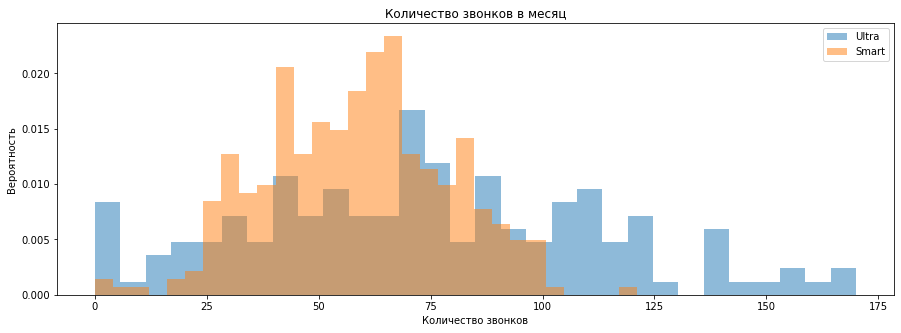

In [26]:
# количество звонков в месяц
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_ultra.calls, 30, alpha=0.5, label='Ultra', density=True)
ax.hist(users_smart.calls, 30, alpha=0.5, label='Smart', density=True)
plt.title('Количество звонков в месяц')
plt.xlabel('Количество звонков')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

Среднее и максимальное количество звонков в месяц меньше у пользователей "Смарт", но распределение количества звонков у пользователей "Ультра" шире - то есть некоторые из них звонят чаще. 

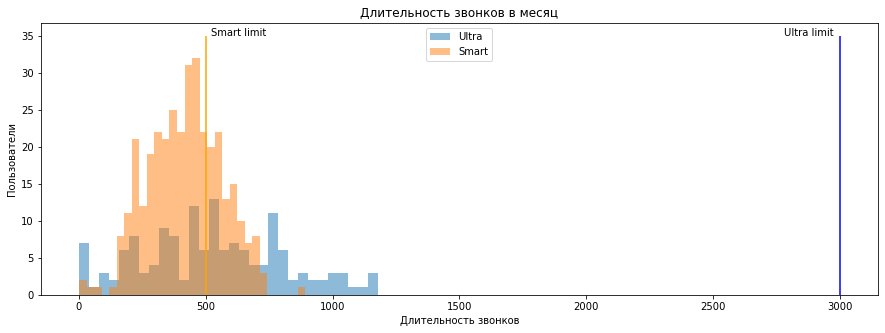

In [27]:
# количество звонков в месяц
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_ultra.duration, 30, alpha=0.5, label='Ultra')
ax.vlines(3000, 0, 35, colors='blue', linestyles='solid')
plt.text(2780, 35, 'Ultra limit')# месячный лимит
ax.hist(users_smart.duration, 30, alpha=0.5, label='Smart')
ax.vlines(500, 0, 35, colors='orange', linestyles='solid')
plt.text(520, 35, 'Smart limit')# месячный лимит
plt.title('Длительность звонков в месяц')
plt.xlabel('Длительность звонков')
plt.ylabel('Пользователи')
plt.legend(loc='upper center')
plt.show()

Общая длительность звонков пользователей "Ультра" не добирается и до половины пакета - максимальная немногим больше 1000 минут в месяц. Общая длительность звонков пользователей "Смарт" может и в полтора раза превысить объем, включенный в пакет, а средняя длительность - 420 минут из 500 в месяц. Пакета хватает примерно 55% пользователей. Средняя общая длительность и отклонение больше у "Ультра".

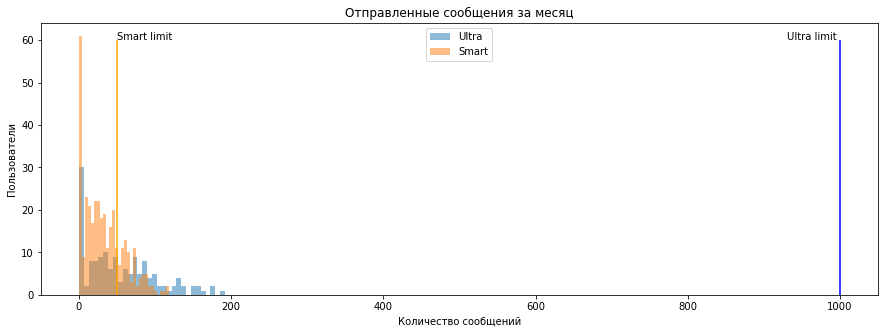

In [28]:
# количество отправленных сообщений
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_ultra.messages, 30, alpha=0.5, label='Ultra')
ax.vlines(1000, 0, 60, colors='blue', linestyles='solid')
plt.text(930, 60, 'Ultra limit')# месячный лимит
ax.hist(users_smart.messages, 30, alpha=0.5, label='Smart')
ax.vlines(50, 0, 60, colors='orange', linestyles='solid')
plt.text(50, 60, 'Smart limit')# месячный лимит
plt.title('Отправленные сообщения за месяц')
plt.xlabel('Количество сообщений')
plt.ylabel('Пользователи')
plt.legend(loc='upper center')
plt.show()

Общее количество отправленных сообщений пользователей "Ультра" не добирается и до четверти пакета - максимальное количество меньше 200 за месяц. Общее количество сообщений пользователей "Смарт" может даже в два раза превысить объем, включенный в пакет, но 75% пользователей пакета хватает. Среднее количество сообщений и отклонение больше у "Ультра".

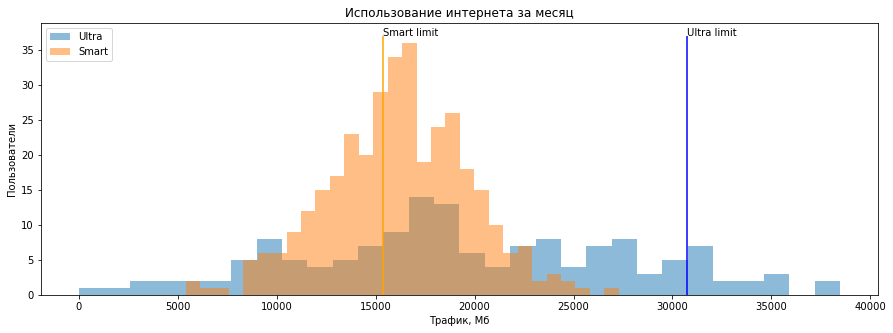

In [29]:
# количество интернета 
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_ultra.mb_used, 30, alpha=0.5, label='Ultra')
ax.vlines(30*1024, 0, 37, colors='blue', linestyles='solid')
plt.text(30*1024, 37, 'Ultra limit')# месячный лимит
ax.hist(users_smart.mb_used, 30, alpha=0.5, label='Smart')
ax.vlines(15*1024, 0, 37, colors='orange', linestyles='solid')
plt.text(15*1024, 37, 'Smart limit')# месячный лимит
plt.title('Использование интернета за месяц')
plt.xlabel('Трафик, Мб')
plt.ylabel('Пользователи')
plt.legend(loc='upper left')
plt.show()

Объем использованного трафика пользователей "Ультра" примерно у 20% пользователей превышает пакет, максимальное достигает 38 Гб (на 25% больше, чем включенные в абонентскую плату 30Гб). Общее количество трафика пользователей "Смарт" может на 80% превысить объем, включенный в пакет, всего 39% пользователей не докупают дополнительного интернета. Средний объем трафика и отклонение больше у "Ультра".

In [30]:
# доля пользователей smart, уложившаяся в пакет трафика
print('{:.2%}'.format(len(users_smart.query('mb_used > 15360')) / len(users_smart)))

61.43%


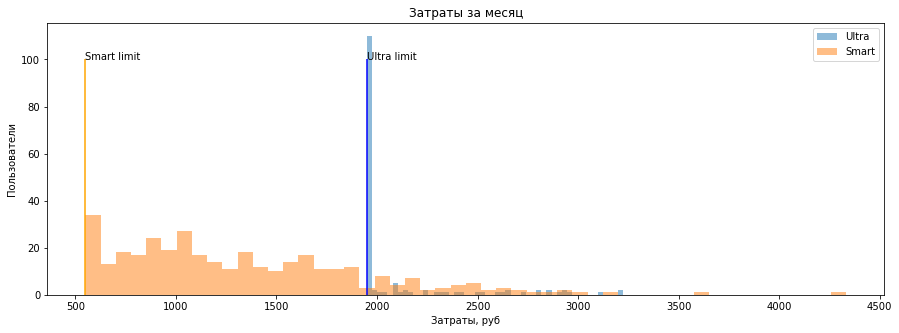

In [31]:
# количество интернета 
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_ultra.total_fee, 50, alpha=0.5, label='Ultra')
ax.vlines(1950, 0, 100, colors='blue', linestyles='solid')
plt.text(1950, 100, 'Ultra limit')# месячный лимит
ax.hist(users_smart.total_fee, 50, alpha=0.5, label='Smart')
ax.vlines(550, 0, 100, colors='orange', linestyles='solid')
plt.text(550, 100, 'Smart limit')# месячный лимит
plt.title('Затраты за месяц')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.show()

Так как почти все затраты, кроме трафика, у пользователей "Ультра" укладываются в пакеты, то и большинство пользователей платит только абонентскую плату (ранее мы подсчитали, что доля таких - более 70%). Пользователи "Смарт" переплачивают гораздо чаще - всего 5% пользователей в среднем используют только включенные в абонентскую плату услуги. 

In [32]:
# посмотрим еще раз на статистики
print('Статистики Ультра')
display(ultra_stats.T)
print('- - ' * 20)
print('Статистики Смарт')
display(smart_stats.T)

Статистики Ультра


count     mean         var     std      5%   median      95%  \
calls     148.00    73.44     1539.28   39.23   10.70    72.00   140.65   
duration  148.00   527.82    79403.55  281.79   69.88   514.54  1022.07   
messages  148.00    54.03     2149.83   46.37    0.00    45.50   145.20   
mb_used   148.00 19574.64 69075748.21 8311.18 6380.13 18699.44 32851.38   
total_fee 148.00  2086.46    89121.78  298.53 1950.00  1950.00  2850.00   

               max  
calls       170.00  
duration   1179.36  
messages    192.00  
mb_used   38463.57  
total_fee  3225.00

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Статистики Смарт


count     mean         var     std       5%   median      95%  \
calls     350.00    58.65      403.66   20.09    27.00    60.00    90.55   
duration  350.00   419.63    21034.15  145.03   189.80   425.06   657.16   
messages  350.00    32.35      702.91   26.51     0.00    27.75    84.55   
mb_used   350.00 16180.61 12810825.62 3579.22 10086.91 16250.36 21922.10   
total_fee 350.00  1324.40   367285.15  606.04   564.48  1177.12  2462.93   

               max  
calls       121.00  
duration    891.50  
messages    118.00  
mb_used   27286.96  
total_fee  4333.33

### Выводы

Пользователей "Смарт" в выборке в три раза больше и в среднем каждый из них тратит меньшую сумму в месяц, но при этом значительная доля пользователей докупает дополнительные пакеты услуг. Пользователи "Ультра" пользуются только основными пакетами звонков и смс, и три четверти пользователей платят только абонентскую плату. 

## Проверка гипотез

### Гипотеза 1

Проверим гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". 

**Н0**: "средняя выручка одинаковая вне зависимости от тарифа". <br>
**H1**: "Средняя выручка отличается"

Значение критического уровня вероятности (альфа) примем равным 5%.

In [33]:
# проверим на средних данных по пользователям
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(users_ultra['total_fee'], users_smart['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.983728825353049e-40
Отвергаем нулевую гипотезу


In [34]:
# проверим на данных по отдельным месячным тратам пользователей
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(users_data[users_data['tariff'] == 'ultra']['total_fee'], 
                       users_data[users_data['tariff'] == 'smart']['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


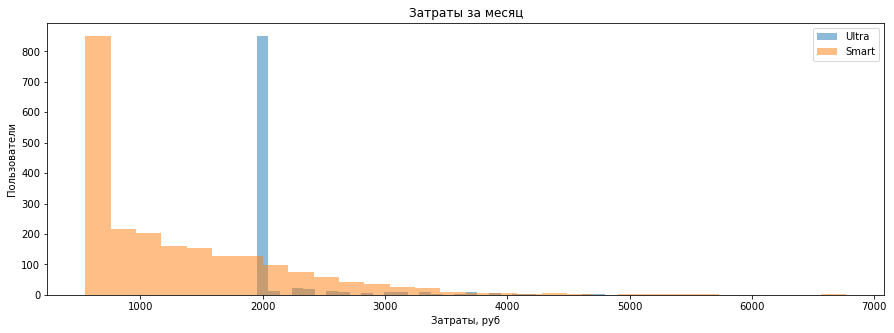

In [35]:
# график распределения
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_data.query('tariff == "ultra"')['total_fee'], 30, alpha=0.5, label='Ultra')
ax.hist(users_data.query('tariff == "smart"')['total_fee'], 30, alpha=0.5, label='Smart')
plt.title('Затраты за месяц')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.show()

Вне зависимости от того, берем мы платежи пользователей в отдельные месяцы или усредненные суммы для каждого пользователя, p-value получается микроскопическим, значит, вероятность, что наборы данных из одной совокупности, крайне мала. На основании принятого нами уровня статистической значимости 5% мы можем предполагать, что наша гипотеза не верна.

Проверим гипотезу 1 также только на пользователях из Москвы.

In [36]:
# сравним пользователей разных тарифов из Москвы
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(users_data.query('city == "Москва" and tariff == "ultra"')['total_fee'], 
                       users_data.query('city == "Москва" and tariff == "smart"')['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1141167338851996e-46
Отвергаем нулевую гипотезу


In [37]:
# сравним пользователей разных тарифов из Москвы и Подмосковья
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(users_data.query('city in ("Москва", "Балашиха", "Химки", "Подольск") and tariff == "ultra"')['total_fee'], 
                       users_data.query('city in ("Москва", "Балашиха", "Химки", "Подольск") and tariff == "smart"')['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.866587915972536e-52
Отвергаем нулевую гипотезу


Среди москвичей (и даже с учетом подмосквичей) гипотеза 1 также подтверждается - выручка пользователей разных тарифов отличается.

### Гипотеза 2

Проверим гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". 

**H0** - выручка в разных городах не отличается. <br>
**H1** - выручка имеет различия.

In [38]:
# сравним пользователей Ultra из разных регионов
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(users_data.query('city == "Москва" and tariff == "ultra"')['total_fee'], 
                       users_data.query('city != "Москва" and tariff == "ultra"')['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8614477943640767
Не получилось отвергнуть нулевую гипотезу


In [39]:
# сравним пользователей Smart из разных регионов
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(users_data.query('city == "Москва" and tariff == "smart"')['total_fee'], 
                       users_data.query('city != "Москва" and tariff == "smart"')['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.18150864159228705
Не получилось отвергнуть нулевую гипотезу


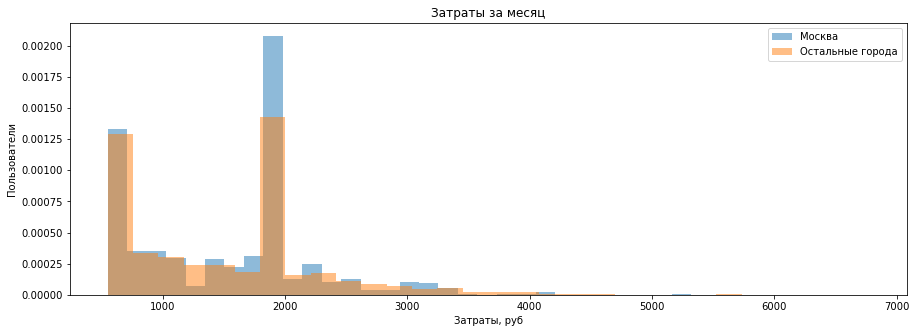

In [40]:
# график распределения
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(users_data.query('city == "Москва"')['total_fee'], 30, alpha=0.5, label='Москва', density=True)
ax.hist(users_data.query('city != "Москва"')['total_fee'], 30, alpha=0.5, label='Остальные города', density=True)
plt.title('Затраты за месяц')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.show()

Внутри каждого из тарифов выручка в столице и регионах не отличается статистически значимо. То есть разница появляется только между тарифами, территориальных отличий почти нет, хотя с меньшей вероятностью это отличие есть между пользователями тарифа "Смарт".

## Общий вывод

Мы изучили выборку данных о расходах клиентов мобильной сети. На основе этих данных мы изучили траты пользователей, их потраченные пакеты минут звонков, смс и интернета.

Распределение потраченных минут на тарифе "Смарт" - среднее 420, дисперсия 21034 и отклонение 145. <br>
Распределение потраченных минут на тарифе "Ультра" - среднее 523, дисперсия 794045 и отклонение 282.

Распределение отправленных смс на тарифе "Смарт" - среднее 32, дисперсия 703 и отклонение 27.<br>
Распределение отправленных смс на тарифе "Ультра" - среднее 54, дисперсия 2150 и отклонение 46.

Распределение потраченного интернет-трафика в мегабайтах на тарифе "Смарт" - среднее 16181, дисперсия 12810825 и отклонение 3579.<br>
Распределение потраченного интернет-трафика в мегабайтах на тарифе "Ультрат" - среднее 19575, дисперсия 69075748 и отклонение 8311.

Распределение затрат на тарифе "Смарт" - среднее 1324, дисперсия 367285 и отклонение 606. <br>
Распределение затрат на тарифе "Ультра" - среднее 2086, дисперсия 89121 и отклонение 299.

Таким образом, большинство пользователей тарифа "Смарт" используют больше услуг, чем включено в базовые пакеты, и платят суммарно до двух раз больше, чем базовая абонентская плата. Но даже с учетом дополнительных зарат средний месячный платеж меньше, чем на тарифе "Ультра". <br>
Большинство пользователей тарифа "Ультра" платят только абонентскую плату и некоторые докупают пакет интернета. 

Затраты пользователей из Москвы не отличается статистически значимо от затрат пользователей из регионов.

Для более точной оценки выгоды для мобильного оператора нужно учесть себестоимость минуты, сообщения и мегабайта трафика - пользователи "Ультра" расходуют гораздо меньше услуг, чем включено в пакеты, но платят за них, в то время как пользователи "Смарт" чаще используют пакеты полностью. 